## How Guided Projects Work

Welcome to the Star Wars Survey guided project! Guided projects help you apply the concepts you learn in Dataquest lessons and start building a portfolio. In this in-browser coding experience, you'll get help and hints to bridge the gap between learning on our platform and applications in the real world.

Doing well on a guided project is a bit different from doing well in a Dataquest lesson, where there's a "correct" answer. Guided projects help you create solutions on your own (although we'll be there to help!).

In this project, you'll work with Jupyter notebook and analyze data on the Star Wars movies. When you're finished, you'll have a notebook you can either add to your portfolio or expand on your own.

Google, StackOverflow, and the documentation for various packages will help you as you progress through this project. Data scientists make extensive use of resources like these as they write code.

Now, let's get started!

## Instructions
- Click "Next" to get started with the project!

## Overview

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you can download from their GitHub repository.

For this project, you'll clean and explore the dataset in Jupyter notebook. To see a sample notebook containing all of the answers, visit the project's GitHub repository.

The following code reads the data into a pandas DataFrame:

In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

We need to specify an encoding, because the dataset has some characters that aren't in Python's default utf-8 encoding. You can read more about character encodings on developer Joel Spolsky's blog.

The data has several columns, including the following:

- `RespondentID` — An anonymized ID for the respondent (person taking the survey)
- `Gender` — the respondent's gender
- `Age` — the respondent's age
- `Household Income` — the respondent's income
- `Education` — the respondent's education level
- `Location (Census Region)` — the respondent's location
- `Have you seen any of the 6 films in the Star Wars franchise?` — a Yes or No response
- `Do you consider yourself to be a fan of the Star Wars film franchise?` — a Yes or No response

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in a column. As a result, this dataset needs a lot of cleaning.

## Instructions
- Read the dataset into a DataFrame.
- Explore the data by entering `star_wars.head(10)`. Look for any strange values in the columns and rows.
- Review the column names with `star_wars.columns`.

In [2]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Cleaning and Mapping Yes/No Columns

Take a look at the next two columns:

- `Have you seen any of the 6 films in the Star Wars franchise?`
- `Do you consider yourself to be a fan of the Star Wars film franchise?`

Both represent `Yes/No` questions. They can also be `NaN` where a respondent chooses not to answer a question. We can use the pandas.Series.value_counts() method on a series to see all of the unique values in a column, along with the total number of times each value appears.

Both columns are currently string types, because the main values they contain are Yes and No. We can make the data a bit easier to analyze later by converting each column to a Boolean with only the values True, False, and NaN. Booleans are easier to work with because we can select the rows that are True or False without having to do a string comparison.

We can use the `pandas.Series.map()` method on series objects to perform the conversion.

For example, imagine we have a series that looks like this:

`series = ["Yes", "No", NaN, "Yes"]`

We can use a dictionary to define a mapping from each value in `series` to a new value:

In [4]:
yes_no = {
    "Yes": True,
    "No": False
}

Then, we can call the `map()` function to perform the mapping:

`series = series.map(yes_no)`

series will look like this:

`[True, False, NaN, True]`

## Instructions
- Convert the `Have you seen any of the 6 films in the Star Wars franchise?` column to the Boolean type.
- Convert the `Do you consider yourself to be a fan of the Star Wars film franchise?` column to the Boolean type.
- When you're finished, both columns should only contain the value `True`, `False`, or `NaN`.

In [5]:
bool_type = {'Yes': True, 'No':False}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] =star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(bool_type)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(bool_type)

# Personal Rough Work!!!

so from this part, i was playing around to see if i can get the same results without help and i did. I use a copy of my dataset (so you are safe, lol). I will also not delete it so you can fall back and review when you study. 

In [7]:
df = star_wars.copy()

In [8]:
# define the cleaning function
def clean_rows(element, value):
    if pd.isna(element):
        return False
    elif element == value:
        return True

In [9]:
df['Star Wars: Episode II  Attack of the Clones'] = df['Unnamed: 4'].apply(clean_rows, value='Star Wars: Episode II  Attack of the Clones')

In [20]:
df['Star Wars: Episode III Revenge of the Sith'] = df['Unnamed: 5'].apply(clean_rows,value='Star Wars: Episode III  Revenge of the Sith')
df['Star Wars: Episode IV A New Hope'] = df['Unnamed: 6'].apply(clean_rows,value='Star Wars: Episode IV  A New Hope')
df['Star Wars: Episode V The Empire Strikes Back'] = df['Unnamed: 7'].apply(clean_rows,value='Star Wars: Episode V The Empire Strikes Back')
df['Star Wars: Episode VI Return of the Jedi'] = df['Unnamed: 8'].apply(clean_rows,value='Star Wars: Episode VI Return of the Jedi')

In [21]:
df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Gender,Age,Household Income,Education,Location (Census Region),Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
0,3292879998,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Male,18-29,NaN,High school degree,South Atlantic,True,True,True,True,True
1,3292879538,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central,False,False,False,False,False
2,3292765271,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Male,18-29,"$0 - $24,999",High school degree,West North Central,True,True,False,False,False
3,3292763116,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,True,True,True,True,True
4,3292731220,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,True,True,True,True,True


In [25]:
#drop columns
drop_col = ['Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8']

df.drop(drop_col,axis=1,inplace=True)

In [31]:
#lets rearrange the column index

# create a list of the desired column order
column_order = ['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
                 'Star Wars: Episode II  Attack of the Clones',
       'Star Wars: Episode III Revenge of the Sith',
       'Star Wars: Episode IV A New Hope',
       'Star Wars: Episode V The Empire Strikes Back',
       'Star Wars: Episode VI Return of the Jedi',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)']

# reorder the columns
df = df.reindex(columns=column_order)

# It ends here. Back to original work!

## Cleaning and Mapping Checkbox Columns

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, `Which of the following Star Wars films have you seen? Please select all that apply`.

The columns for this question are:

- `Which of the following Star Wars films have you seen? Please select all that apply`. — whether or not the respondent saw `Star Wars: Episode I The Phantom Menace`.
- `Unnamed: 4` — whether or not the respondent saw `Star Wars: Episode II Attack of the Clones`.
- `Unnamed: 5` — whether or not the respondent saw `Star Wars: Episode III Revenge of the Sith`.
- `Unnamed: 6` — whether or not the respondent saw `Star Wars: Episode IV A New Hope.
- `Unnamed: 7` — whether or not the respondent saw `Star Wars: Episode V The Empire Strikes Back`.
- `Unnamed: 8` — whether or not the respondent saw `Star Wars: Episode VI Return of the Jedi`.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is `NaN`, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive. We can convert the values the same way we did earlier, except that we'll need to include the movie title and `NaN` in the mapping dictionary.

For example, imagine we had this column series:

`["Star Wars: Episode I  The Phantom Menace", NaN, "Star Wars: Episode I  The Phantom Menace"]`

We could convert the values using this mapping dictionary:

`{
    "Star Wars: Episode I  The Phantom Menace": True,
    np.NaN: False
}`


After calling the `map()` method on a series, the column should only contain the values True and False.

Next, we'll need to rename the columns to reflect what they represent. We can use the `pandas.DataFrame.rename()` method on DataFrames to do this.

The `df.rename()` method works a lot like `map()`. We pass it a dictionary that maps the current column names to new ones:

`star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1"
})`

The `pandas.DataFrame.rename()` method only renames the columns we specify in the dictionary; it won't change the names of other columns. The code above renames the `Which of the following Star Wars films have you seen? Please select all that apply. column to seen_1`.

## Instructions
- Convert each column above so that it only contains the values `True` and `False`.
  - You can select the column names quicker by entering `star_wars.columns[3:9]`, rather than typing them out.
  - Be very careful with spacing when constructing your mapping dictionary! In the cells, `Star Wars: Episode I The Phantom     Menace` has two spaces between the end of `Episode I` and the start of `The Phantom`, but this isn't the case in `Star Wars: Episode VI Return of the Jedi`. Check the values in the cells carefully to make sure you use the appropriate spacing.
- Rename each of the columns above so the names are more intuitive. We recommend using seen_1 to indicate whether the respondent saw `Star Wars: Episode I The Phantom Menace`, seen_2 for `Star Wars: Episode II Attack of the Clones`, and so on.
- When you're finished, the columns should have intuitive names, along with `True` and `False` values that indicate whether the respondent saw each of the six Star Wars movies.

In [34]:
import numpy as np

movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

In [35]:
star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
        })

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning the Ranking Columns

The next six columns ask the respondent to rank the Star Wars movies in order from least to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:

- `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film`. - How much the respondent liked `Star Wars: Episode I The Phantom Menace`

- `Unnamed: 10` — How much the respondent liked `Star Wars: Episode II Attack of the Clones`
- `Unnamed: 11` — How much the respondent liked `Star Wars: Episode III Revenge of the Sith`
- `Unnamed: 12` — How much the respondent liked `Star Wars: Episode IV A New Hope`
- `Unnamed: 13` — How much the respondent liked `Star Wars: Episode V The Empire Strikes Back`
- `Unnamed: 14` — How much the respondent liked `Star Wars: Episode VI Return of the Jedi`

Fortunately, these columns don't require much cleaning. We'll need to convert each column to a numeric type, then rename the columns so that we can tell what they represent more easily.

We can do the numeric conversion with the `pandas.DataFrame.astype()` method on DataFrames. In this case, we can use code that looks like this:

In [36]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

The code above converts column `9` up to but not including column `15` to the float data type.

## Instructions
- Convert each of the columns above to a `float` type.
- You can select all of the column names with `star_wars.columns[9:15]`, rather than typing each one in.
- Give each column a more descriptive name. We suggest `ranking_1`, `ranking_2`, and so on.
- You can use the `df.rename()` method from the previous screen to accomplish this.

In [52]:
#convert to float type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

rename_cols ={
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.'
    : 'ranking_1',
    'Unnamed: 10' : 'ranking_2',
    'Unnamed: 11' : 'ranking_3', 
    'Unnamed: 12' : 'ranking_4', 
    'Unnamed: 13' : 'ranking_5',
       'Unnamed: 14' : 'ranking_6'
}

star_wars.rename(rename_cols,axis=1,inplace=True)

In [53]:
#ets check if our cleaning worked
star_wars.columns[9:15]

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')

## Finding the Highest-Ranked Movie

Now that we've cleaned up the ranking columns, we can find the highest-ranked movie quicker. To do this, take the mean of each ranking columns using the `pandas.DataFrame.mean()` method on DataFrames.

## Instructions
- Use the `pandas.DataFrame.mean()` method to compute the mean of each `ranking` columns from the previous screen.
- Make a bar chart of each column. You can use a matplotlib bar chart for this.
  - Run `%matplotlib inline` beforehand to show your plots in the notebook.
- Write up a summary of what you've done so far in a markdown cell. Also discuss why you think the respondents ranked the movies the way they did.
- Remember that a lower ranking is better!

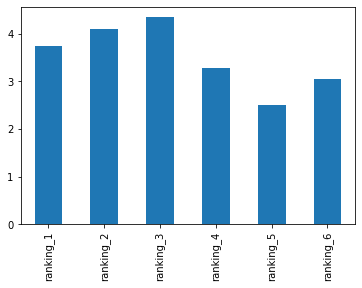

In [65]:
mean_ranking = star_wars.iloc[:,9:15].mean()
%matplotlib inline
mean_ranking.plot.bar();

So far, we've cleaned up the data, renamed several columns, and computed the average ranking of each movie. As we suspected, it looks like the "original" movies are rated much more highly than the newer ones.

## Finding the Most Viewed Movie

Earlier in this project, we cleaned up the seen columns and converted their values to the Boolean type. When we call methods like `pandas.DataFrame.sum()` or `mean()`, they treat Booleans like integers. They consider `True` a `1` and `False` a `0`. That means we can figure out how many people have seen each movie just by taking the sum of the column (even though they contain Boolean values).

## Instructions
- Use the `df.sum()` method to compute the sum of each seen columns.
- Make a bar chart of each ranking. You can use a matplotlib bar chart for this.
- Write up your thoughts on why the results look the way they do in a markdown cell. Also discuss how the results correlate with the rankings.

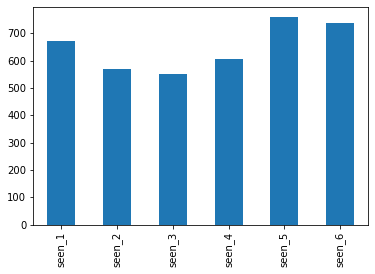

In [72]:
sum_movies = star_wars.iloc[:,3:9].sum() 

sum_movies.plot.bar(); 

It appears that more respondents aw the original movies than the newer movies. This reinforces what we saw in the rankings, where the earlier movies seem to be more popular.

## Exploring the Data by Binary Segments

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups. Here are a few examples:

- `Do you consider yourself to be a fan of the Star Wars film franchise?` — True or False
- `Do you consider yourself to be a fan of the Star Trek franchise?` — `Yes` or `No`
- `Gender` — `Male` or `Female`

We can split a DataFrame into two groups based on a binary column by creating two subsets of that column. For example, we can split on the `Gender` column like this:

In [ ]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

The subsets allow us to compute the most viewed movie, the highest-ranked movie, and other statistics separately for each group.

## Instructions
- Split the data into two groups based on one of the binary columns above.
- Redo the two previous analyses (find the most viewed movie and the highest-ranked movie) separately for each group, and then compare the results.
- If you see any interesting patterns, write about them in a markdown cell.

In [73]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

In [76]:
print(males.shape[0])
print(females.shape[0])

497
549


It looked like more women participated in the survey than males. let's looked at how they ranked the movies

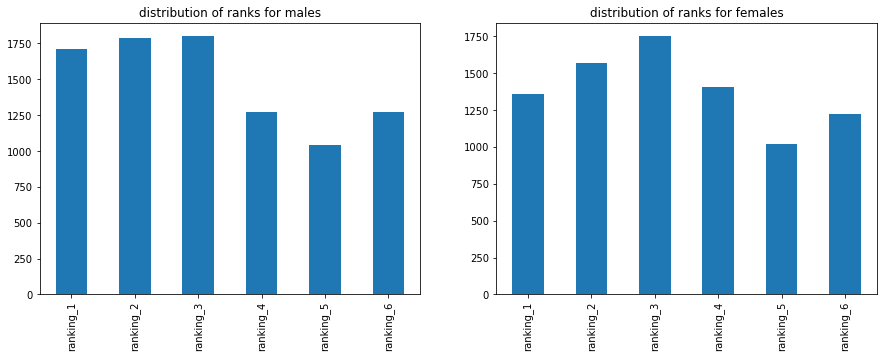

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
males.iloc[:,9:15].sum().plot.bar()
plt.title('distribution of ranks for males');

plt.subplot(1,2,2)
females.iloc[:,9:15].sum().plot.bar()
plt.title('distribution of ranks for females');

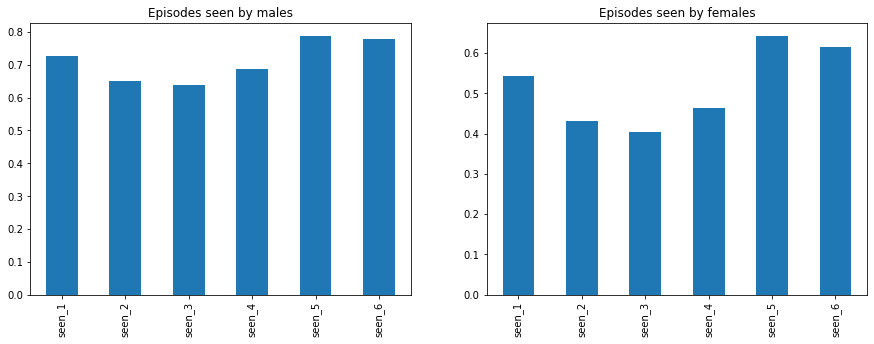

In [90]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
males.iloc[:,3:9].mean().plot.bar()
plt.title('Episodes seen by males');

plt.subplot(1,2,2)
females.iloc[:,3:9].mean().plot.bar()
plt.title('Episodes seen by females');

Interestingly, more males watches episodes 1-3, but males liked them far less than females did

## Next Steps

That's it for the guided steps! We highly recommend exploring the data further on your own.

Here are some potential next steps:

- Try to segment the data based on columns like `Education`, `Location (Census Region)`, and `Which character shot first?`, which aren't binary. Are there any interesting patterns?
- Clean columns 15 through 28, which contain data on the characters respondents view favorably and unfavorably.
  - Which character do respondents like the most?
  - Which character do respondents dislike the most?
  - Which character is the most controversial (split between likes and dislikes)?

Curious to see what other students have done on this project? Head over to our Community to check them out. While you are there, please remember to give us your feedback!

And of course, we welcome you to share your own project and show off your hard work. Head over to our Community to share your finished Guided Project!

We highly recommend creating a GitHub repository and placing this project there. It will help other people see your work, including employers. As you start to put multiple projects on GitHub, you'll have the beginnings of a strong portfolio.

You're welcome to keep working on the project here, but we highly recommend downloading it to your computer using the download icon above and working on it there.